# Preprocess dataframe

In [ ]:
import google.colab.drive
google.colab.drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
from datetime import datetime
original_df = pd.read_csv("/content/drive/MyDrive/Updated_LiveLab.csv")
original_df = pd.read_csv('LiveLab_top_15_MATHia_7x_classes_anon.csv')

# Reset Dataframe

In [ ]:
# Sampling relevant columns
selected_columns = ['Anon Student Id', 'Session Id', 'Time', 'Problem Name', 'Step Name', 'Help Level', 'Outcome', 'CF (Skill New p-Known)', 'helpedTransaction']
df = original_df[selected_columns]
df.columns.to_list()
print(len(df))
# all_session_id = df['Session Id'].unique().tolist()
# all_student_id = df['Anon Student Id'].unique().tolist()
# print(df['Session Id'].value_counts())
print(df['helpedTransaction'].value_counts())

1650346
helpedTransaction
False    1649713
True         633
Name: count, dtype: int64


In [ ]:
# get unique pairings of student id, session id, and problem name
selected_columns_for_unique_pairs = ['Anon Student Id', 'Session Id', 'Problem Name']
df_unique_pairs = original_df[selected_columns_for_unique_pairs]
df_unique_pairs = df_unique_pairs.drop_duplicates()
df_unique_pairs

,Anon Student Id,Session Id,Problem Name
0,s141,qb8uqykv9llqylywx-ilzwqrqn0:1679667026583,analyzing_models_1step-029
7,s293,fnujx0umciftgltadtsgsxhc6du:1675879108611,analyzing_models_1step-087
13,s316,vb83ww7l76xaovzvtgfwql4ucda:1678896223295,analyzing_models_1step-062
22,s338,pcki31wtnemzgox9aylrbmpmpoi:1682435545439,analyzing_models_1step-053
23,s338,r07ryrtrtn2nstdjeuhwsu678e0:1682435230683,analyzing_models_1step-053
...,...,...,...
1650303,s341,fzrja78lda04vk4tjj5w9wv22mm:1682432727221,volume_surface_area_cone_sa-075
1650310,s341,fzrja78lda04vk4tjj5w9wv22mm:1682432727221,volume_surface_area_cylinder_sa-063
1650321,s341,fzrja78lda04vk4tjj5w9wv22mm:1682432727221,volume_surface_area_cylinder_sa-070
1650332,s341,fzrja78lda04vk4tjj5w9wv22mm:1682432727221,volume_surface_area_sphere_sa-051


# Randomly sample one student one id

In [ ]:
# Sampling one student and one id
# student_id ='s6'
# session_id ='-yqpoow1j4_rikmk0bil1pmzgpy:1670507333394'
# problem_name = 'decimal_ops_algorithm_divide_whole-072'

selected_columns = ['Anon Student Id', 'Session Id', 'Time', 'Problem Name', 'Step Name', 'Help Level', 'Outcome', 'CF (Skill New p-Known)', 'helpedTransaction']
df = original_df[selected_columns]

index_selecting = 8000
student_id, session_id, problem_name = df_unique_pairs.iloc[index_selecting]
print(student_id, session_id, problem_name)

df = df[df['Anon Student Id'] == student_id]
df = df[df['Session Id'] == session_id]
df = df[df['Problem Name'] == problem_name]
df
# print(df[df['Anon Student Id'] == student_id]['Session Id'].value_counts())

s335 ay7nhyeuifdutcw82amcg8lmp-w:1674751331968 comparing_theoretical_and_experimental_probabilities_04


,Anon Student Id,Session Id,Time,Problem Name,Step Name,Help Level,Outcome,CF (Skill New p-Known),helpedTransaction
154746,s335,ay7nhyeuifdutcw82amcg8lmp-w:1674751331968,2023-01-26 17:19:59,comparing_theoretical_and_experimental_probabi...,component6.1,0,OK,NaN,False
154747,s335,ay7nhyeuifdutcw82amcg8lmp-w:1674751331968,2023-01-26 17:20:24,comparing_theoretical_and_experimental_probabi...,component8.1,0,ERROR,NaN,False
154748,s335,ay7nhyeuifdutcw82amcg8lmp-w:1674751331968,2023-01-26 17:20:26,comparing_theoretical_and_experimental_probabi...,component8.1,0,ERROR,NaN,False
154749,s335,ay7nhyeuifdutcw82amcg8lmp-w:1674751331968,2023-01-26 17:20:28,comparing_theoretical_and_experimental_probabi...,component8.1,0,ERROR,NaN,False
154750,s335,ay7nhyeuifdutcw82amcg8lmp-w:1674751331968,2023-01-26 17:20:28,comparing_theoretical_and_experimental_probabi...,component8.1,2,INITIAL_HINT,NaN,False


# Sample rows where helpedtransaction == true

In [ ]:
df_where_help_is_true = df[df['helpedTransaction'] == True]
print(df_where_help_is_true['Anon Student Id'].unique().tolist())
print(df_where_help_is_true['Session Id'].unique().tolist())
print(len(df_where_help_is_true))
pairs = []
for student_id in df_where_help_is_true['Anon Student Id'].unique().tolist():
  for session_id in df_where_help_is_true[df_where_help_is_true['Anon Student Id'] == student_id]['Session Id'].unique().tolist():
    pairs.append((student_id, session_id))
print(pairs)

['s247', 's221', 's334', 's144', 's132', 's61', 's346', 's24', 's99', 's343', 's286', 's345', 's23', 's267', 's258', 's82', 's290', 's337', 's220', 's173', 's260', 's70', 's195', 's46', 's42', 's161', 's246', 's231', 's44', 's176', 's152', 's52', 's96', 's17', 's62', 's202', 's175', 's178', 's264', 's146', 's102', 's94', 's66', 's143', 's6', 's215', 's124', 's222', 's304', 's13', 's230', 's43', 's58', 's98', 's237', 's133', 's353', 's228', 's69', 's198', 's261', 's285', 's201', 's118', 's151', 's273', 's127', 's138', 's330', 's340', 's41', 's149', 's297', 's121', 's188', 's27', 's311', 's177', 's95', 's318', 's293', 's2', 's234', 's229', 's257', 's10', 's164', 's299', 's227', 's244', 's217', 's324', 's335', 's305', 's110', 's344', 's80', 's114', 's37', 's191', 's32', 's315', 's339', 's113', 's112', 's157', 's241', 's248', 's209', 's271', 's279', 's259', 's183', 's328', 's282', 's86', 's280', 's180', 's55', 's119', 's36', 's218', 's358', 's203', 's122', 's68', 's303', 's29', 's300', 's7

# Load auxiliary functions

In [ ]:
def is_deliberate_function(last_action, last_transaction, this_transaction):
    seconds_since_last_action = int((datetime.strptime(this_transaction['Time'], "%Y-%m-%d %H:%M:%S") - datetime.strptime(last_transaction['Time'], "%Y-%m-%d %H:%M:%S")).total_seconds())
    if last_action == 'error': return seconds_since_last_action > config['error_threshold']
    elif last_action == 'initial_hint' or 'hint_level_change': return seconds_since_last_action > config['hint_threshold'] # improvement: from calculated hint_threshold to pre-defined hint threshold
    return seconds_since_last_action > config['new_step_threshold']

def seen_all_hint_levels_function(this_transaction, four_leveled_steps):
    has_fourth_level_hint =  (this_transaction['Problem Name'], this_transaction['Step Name']) in four_leveled_steps
    return False if (this_transaction['Help Level'] < 3 or (has_fourth_level_hint and this_transaction['Help Level'] < 4)) else True

def sense_of_what_to_do_function(this_transaction):

    # Jocelyn: need the [p_know] for all skills in rawSkills to be above the senseOfWhatToDoThreshold
    return this_transaction['CF (Skill New p-Known)'] > config['sense_of_what_to_do_threshold']

def is_low_skill_step_some_function(this_transaction):
    return this_transaction['CF (Skill New p-Known)'] <= config['familiarity_threshold']

def is_familiar_function(this_transaction):
    return this_transaction['CF (Skill New p-Known)'] > config['familiarity_threshold']

In [ ]:
def evaluate_action(last_transaction, this_transaction, four_leveled_steps):
    last_action = last_transaction['Outcome'].lower() # hint or others
    is_correct = (this_transaction['Outcome'].lower() == "ok")
    last_action_is_error, last_action_is_hint, last_action_unclear_fix = (last_action == "error"), (last_action == 'initial_hint' or 'hint_level_change'), (last_action == 'jit')

    seen_all_hint_levels = seen_all_hint_levels_function(this_transaction, four_leveled_steps)
    is_deliberate = is_deliberate_function(last_action, last_transaction, this_transaction)

    # BKT based parameters
    sense_of_what_to_do = sense_of_what_to_do_function(this_transaction)
    is_low_skill_step_some = is_low_skill_step_some_function(this_transaction)
    is_familiar = is_familiar_function(this_transaction)

    if this_transaction['Outcome'].lower() == "hint":
        print("isHint")
        if is_deliberate:
            print("isDeliberate")
            if is_low_skill_step_some and not last_action_is_error:
                return "not acceptable/asked hint on low skill step"
            else:
                if not seen_all_hint_levels and (not is_familiar or (last_action_is_error and last_action_unclear_fix) or last_action_is_hint):
                    return "preferred/ask hint"
                elif is_familiar and not sense_of_what_to_do or last_action_is_hint:
                    return "acceptable/ask hint"
                else:
                    return "hint abuse"
        else:
            print("not deliberate")
            return "hint abuse"

    else:
        if is_low_skill_step_some and not last_action_is_error:
            return "preferred/try step on low skill step"
        else:
            if is_deliberate:
                if (is_familiar and not (last_action_is_error and last_action_unclear_fix)) or (
                        last_action_is_hint):
                    return "preferred/try step"
                elif seen_all_hint_levels and not (last_action_is_error and last_action_unclear_fix):
                    return "preferred/try step"
                elif is_correct:
                    return "acceptable/try step"
                elif seen_all_hint_levels:
                    if last_action_is_error and last_action_unclear_fix:
                        return "ask teacher for help"
                else:
                    return "hint avoidance"
            else:
                return "not deliberate"

In [ ]:
def is_not_deliberate(help_model_output): return help_model_output == "not deliberate"
def is_gaming(help_model_output): return False
def is_abusing_hints(help_model_output): return help_model_output == "hint abuse"

# Run this code to know the maximum hint help level of each problem & associated steps from this session
def get_four_leveled_steps(df):
  four_leveled_steps = set()
  for i in range(len(df)):

    if df.iloc[i]['Help Level'] == 4:
      if (df.iloc[i]['Problem Name'], df.iloc[i]['Step Name']) not in four_leveled_steps:
        prob_step_tuple = (df.iloc[i]['Problem Name'], df.iloc[i]['Step Name'])
        four_leveled_steps.add(prob_step_tuple)
  #print(four_leveled_steps)
  #print(f"{len(four_leveled_steps)} problem steps are of level 4.")
  return four_leveled_steps

# Main function calculating status


In [ ]:
# Function to calculate the "System Misuse" status based on conditions
def calculate_status(df, window_size, threshold, variable_name):
    status, window = [], []
    #print(f'Working on {variable_name}:')
    if variable_name == "system_misuse":

      for i in range(len(df)):
          outcome = df['Outcome'].iloc[i]  # mostly OK, ERROR, INITIAL_HINT, JIT, HINT_LEVEL_CHANGE
          four_leveled_steps = get_four_leveled_steps(df)
          model_output = evaluate_action(df.iloc[i - 1], df.iloc[i], four_leveled_steps)
          # Add to attempt window based on is gaming, is abusing hints, and is not deliberate
          attemptCorrect = 1 if is_abusing_hints(model_output) or is_not_deliberate(model_output) else 0
          window.append(attemptCorrect)
          # Check length fixed
          if len(window) == window_size: window.pop(0)
          # System_misuse window detection logic
          status.append(True) if sum(window) >= threshold else status.append(False)

    if variable_name == "students_doing_well":

      for i in range(len(df)):
          # Add to attempt window based on action correct
          attemptCorrect = 1 if df['Outcome'].iloc[i].lower() == "ok" else 0
          window.append(attemptCorrect)
          # Check length fixed
          if len(window) == window_size: window.pop(0)
          # Students_doing_well detection logic
          print('sum window = ', sum(window))
          status.append(True) if sum(window) >= threshold else status.append(False)

    return status

config = {}
config['error_threshold'] = 2
config['new_step_threshold'] = 1
config['sense_of_what_to_do_threshold'] = 0.6
config['familiarity_threshold'] = 0.4
config['window_size'] = 10
config['hint_threshold'] = 6

config['system_misuse_threshold'] = 5 # the higher the threshold, the lower system misuse
config['students_doing_well_threshold'] = 7 # students_doing_well frequency

def get_statistics(status, variable_name):
  # print('Check if the first 9 outputs are all False: ', not (True in status[:9]))
  # print('First 20 outputs are ', status[:20], '...')
  t, f = 0, 0
  for i in range(len(status)):
    if status[i]: t+=1
    else: f +=1
  # print(f'True: {t} results out of {len(status)}')
  # print(f'False: {f} results out of {len(status)}')
  rate = round(t/len(status)*100, 2)
  return f'{variable_name} rate = {rate}%', rate

In [ ]:
print(len(df))
print(df.head(1))
system_misuse_status = calculate_status(df, config['window_size'], config['system_misuse_threshold'], "system_misuse")
print(get_statistics(system_misuse_status, "system_misuse"))

df['system_misuse_status'] = system_misuse_status
output_file_path = 'system_misuse_' + student_id + session_id + problem_name + '.csv'
df.to_csv(output_file_path, index=False)
output_file_path  # Return the path to the new file

0
Empty DataFrame
Columns: [Anon Student Id, Session Id, Time, Problem Name, Step Name, Help Level, Outcome, CF (Skill New p-Known), helpedTransaction, system_misuse_status]
Index: []
Working on system_misuse:


ZeroDivisionError: division by zero

In [ ]:
students_doing_well_status = calculate_status(df, config['window_size'], config['students_doing_well_threshold'], "students_doing_well")
print(get_statistics(students_doing_well_status, "students_doing_well"))

df['students_doing_well_status'] = students_doing_well_status
output_file_path = 'students_doing_well__' + student_id + session_id + problem_name + '.csv'
df.to_csv(output_file_path, index=False)
output_file_path  # Return the path to the new file

Working on students_doing_well:
('students_doing_well rate = 20.83%', 20.83)


'students_doing_well__s337m4wd0dvvgv90oq6yavaumbh1fwo:1682339164026multiple_representations_of_ratios_03.csv'

In [ ]:
def get_analysis_file(link, student_id, session_id, problem_name):
  analysis = pd.read_csv(link, delimiter='\t')
  analysis = analysis[analysis['Student_ID'] == student_id]
  return analysis
# analysis = get_analysis_file("/content/drive/MyDrive/Analysis-misuse-x567037_output.txt", student_id, session_id, problem_name)
# #analysis = get_analysis_file("/content/drive/MyDrive/Analysis-studentdoingwell-x377458_output.txt", student_id, session_id, problem_name)

In [ ]:
analysis.head(2)

,Student_ID,Time,Detector_Name,Value
1062,s335,2023-01-04T17:01:59.000Z,system_misuse,"0, > 0 s,"
1063,s335,2023-01-04T17:02:03.000Z,system_misuse,"0, > 0 s,"


In [ ]:
df.head(2)

,Anon Student Id,Session Id,Time,Problem Name,Step Name,Help Level,Outcome,CF (Skill New p-Known),helpedTransaction,system_misuse_status
154746,s335,ay7nhyeuifdutcw82amcg8lmp-w:1674751331968,2023-01-26 17:19:59,comparing_theoretical_and_experimental_probabi...,component6.1,0,OK,NaN,False,False
154747,s335,ay7nhyeuifdutcw82amcg8lmp-w:1674751331968,2023-01-26 17:20:24,comparing_theoretical_and_experimental_probabi...,component8.1,0,ERROR,NaN,False,False


In [ ]:
print(output_file_path)
calculated_df = pd.read_csv(output_file_path)
calculated_df.head(2)

system_misuse_s335ay7nhyeuifdutcw82amcg8lmp-w:1674751331968comparing_theoretical_and_experimental_probabilities_04.csv


,Anon Student Id,Session Id,Time,Problem Name,Step Name,Help Level,Outcome,CF (Skill New p-Known),helpedTransaction,system_misuse_status
0,s335,ay7nhyeuifdutcw82amcg8lmp-w:1674751331968,2023-01-26 17:19:59,comparing_theoretical_and_experimental_probabi...,component6.1,0,OK,NaN,False,False
1,s335,ay7nhyeuifdutcw82amcg8lmp-w:1674751331968,2023-01-26 17:20:24,comparing_theoretical_and_experimental_probabi...,component8.1,0,ERROR,NaN,False,False


In [ ]:
# combined_analysis = pd.read_csv("/content/drive/MyDrive/combined-Analysis-misuse-x567037_output.csv")
# combined_analysis = combined_analysis[combined_analysis['Anon Student Id'] == student_id]
# combined_analysis = combined_analysis[combined_analysis['Session Id'] == session_id]
# combined_analysis = combined_analysis[combined_analysis['Problem Name'] == problem_name]
# combined_analysis.head(2)

,Anon Student Id,Session Id,Time,KC_Model(MATHia),Level (Section),Problem Name,Step Name,Attempt At Step,Help Level,Selection,...,Time_Diff_Minutes,Idle,Monitor,Working,Struggle,Hint Abuse,Attempt_Count,Time.1,Detector_Name,Value
0,s6,-yqpoow1j4_rikmk0bil1pmzgpy:1670507333394,2022-12-08 13:54:47,position divisor.,decimal_ops_whole_number_and_decimal_quotients,decimal_ops_algorithm_divide_whole-072,gn-enter-divisor,1,0,NaN,...,NaN,False,False,False,False,False,0.0,2022-12-08T13:54:47.000Z,system_misuse,"0, > 0 s,"
1,s6,-yqpoow1j4_rikmk0bil1pmzgpy:1670507333394,2022-12-08 13:54:50,position dividend.,decimal_ops_whole_number_and_decimal_quotients,decimal_ops_algorithm_divide_whole-072,gn-enter-dividend,1,0,NaN,...,0.05,False,False,False,False,False,0.0,2022-12-08T13:54:50.000Z,system_misuse,"0, > 0 s,"


5 5 92


In [ ]:
# misuse
calculated_df = pd.read_csv(output_file_path)

times_of_misuse = set()
for i in range(len(calculated_df)):
  if calculated_df.iloc[i]['system_misuse_status']:
    times_of_misuse.add(calculated_df.iloc[i]['Time'])
print(f"{len(times_of_misuse)} total number of misuse from the above calculation.")

num_misuse_correctly_identified = 0
times_of_misuse_analysis = set()
for i in range(len(analysis)):
  t = ' '.join(analysis.iloc[i]['Time'].split('.')[0].split('T'))
  times_of_misuse_analysis.add(t)
  if t in times_of_misuse:
    num_misuse_correctly_identified += 1

# verify correct length
print('Verifying correct length (expect True): ', True if len(calculated_df) == len(df) and len(analysis) <= len(calculated_df) else len(calculated_df), len(df), len(analysis))

print(f"{len(analysis)} total number of misuse in analysis.")
print(f"{round(num_misuse_correctly_identified/len(times_of_misuse_analysis)*100, 2)}% of system misuse is correctly identified.")

0 total number of misuse from the above calculation.
Verifying correct length (expect True):  5 0 5
5 total number of misuse in analysis.
0.0% of system misuse is correctly identified.


In [ ]:
# doing well
calculated_df = pd.read_csv(output_file_path)
print(len(calculated_df))

times_of_doing_well = set()
for i in range(len(calculated_df)):
  if calculated_df.iloc[i]['students_doing_well_status']:
    times_of_doing_well.add(calculated_df.iloc[i]['Time'])
print(f'{len(times_of_doing_well)} total number of doing well from the above calculation.')

times_of_doing_well_analysis = set()
times_of_doing_well_correct_identified = 0
for i in range(len(analysis)):
  t = ' '.join(analysis.iloc[i]['Time'].split('.')[0].split('T'))
  if analysis.iloc[i]['Value'] == 1:
    times_of_doing_well_analysis.add(t)
    if t in times_of_doing_well:
      times_of_doing_well_correct_identified += 1


print(f"{len(times_of_doing_well_analysis)} total number of doing well in analysis.")

print(f"{round(times_of_doing_well_correct_identified/len(times_of_doing_well_analysis)*100, 2)}% of doing well is correctly identified.")


25
1 total number of doing well from the above calculation.
They are: {'2022-12-08 13:55:27'}
1 total number of doing well in analysis.
They are: {'2022-12-08 13:55:55'}
0.0% of doing well is correctly identified.


In [ ]:
original_df[(original_df['Anon Student Id'] == 's293')]

,Anon Student Id,Session Id,Time,KC_Model(MATHia),Level (Section),Problem Name,Step Name,Attempt At Step,Help Level,Selection,...,CF (Skill New p-Known),CF (Module),CF (Workspace Encounter),CF (Workspace Variant),CF (Workspace Progress Status),CF (Skill Opportunity),cf_school_id,cf_class_id,"Selection <- ifelse(Action == ""Done Button"", ""Done Button"", NA)",helpedTransaction
7,s293,fnujx0umciftgltadtsgsxhc6du:1675879108611,2023-02-08 18:19:33,match _dep expression with description.,analyzing_models_1step,analyzing_models_1step-087,gn-classify-item-3,1,0,NaN,...,0.879556,determining_unknown_quantities_mb_c1,0,empty-variant,GRADUATED,5.0,sch4,c2,NaN,False
8,s293,fnujx0umciftgltadtsgsxhc6du:1675879108611,2023-02-08 18:19:37,match _dep expression with description.,analyzing_models_1step,analyzing_models_1step-087,gn-classify-item-4,1,0,NaN,...,0.967932,determining_unknown_quantities_mb_c1,0,empty-variant,GRADUATED,6.0,sch4,c2,NaN,False
9,s293,fnujx0umciftgltadtsgsxhc6du:1675879108611,2023-02-08 18:19:44,match _slope expression with description.,analyzing_models_1step,analyzing_models_1step-087,gn-classify-item-2,1,0,NaN,...,0.558744,determining_unknown_quantities_mb_c1,0,empty-variant,GRADUATED,1.0,sch4,c2,NaN,False
10,s293,fnujx0umciftgltadtsgsxhc6du:1675879108611,2023-02-08 18:19:44,interpret scenario with numbers,analyzing_models_1step,analyzing_models_1step-087,gn-classify-item-2,1,0,NaN,...,0.991360,determining_unknown_quantities_mb_c1,0,empty-variant,GRADUATED,3.0,sch4,c2,NaN,False
11,s293,fnujx0umciftgltadtsgsxhc6du:1675879108611,2023-02-08 18:19:46,match _indep expression with description.,analyzing_models_1step,analyzing_models_1step-087,gn-classify-item-1,1,0,NaN,...,0.957435,determining_unknown_quantities_mb_c1,0,empty-variant,GRADUATED,3.0,sch4,c2,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1630114,s293,awwbhs_nexwkmbriuj6x-nxqffo:1673546664394,2023-01-12 18:15:33,NaN,worksheet_grapher_a1_patterns_1step_expr_ops,worksheet_grapher_a1_patterns_1step_expr_ops_028,Expression-Dep,0,1,NaN,...,NaN,determining_unknown_quantities_mb_c1,0,empty-variant,GRADUATED,NaN,sch4,c2,NaN,False
1630115,s293,awwbhs_nexwkmbriuj6x-nxqffo:1673546664394,2023-01-12 18:15:39,NaN,worksheet_grapher_a1_patterns_1step_expr_ops,worksheet_grapher_a1_patterns_1step_expr_ops_028,Expression-Dep,0,2,NaN,...,NaN,determining_unknown_quantities_mb_c1,0,empty-variant,GRADUATED,NaN,sch4,c2,NaN,False
1630116,s293,awwbhs_nexwkmbriuj6x-nxqffo:1673546664394,2023-01-12 18:15:46,NaN,worksheet_grapher_a1_patterns_1step_expr_ops,worksheet_grapher_a1_patterns_1step_expr_ops_028,Expression-Dep,0,3,NaN,...,NaN,determining_unknown_quantities_mb_c1,0,empty-variant,GRADUATED,NaN,sch4,c2,NaN,False
1630117,s293,awwbhs_nexwkmbriuj6x-nxqffo:1673546664394,2023-01-12 18:15:57,NaN,worksheet_grapher_a1_patterns_1step_expr_ops,worksheet_grapher_a1_patterns_1step_expr_ops_028,Expression-Dep,5,0,NaN,...,NaN,determining_unknown_quantities_mb_c1,0,empty-variant,GRADUATED,NaN,sch4,c2,NaN,False


# Verify Accuracy

In [ ]:
import pandas as pd
from datetime import datetime
original_df = pd.read_csv('/content/drive/MyDrive/LiveLab_top_15_MATHia_7x_classes_anon.csv')

## System Misuse

In [ ]:
xs = []
ys = []
selected_columns = ['Anon Student Id', 'Session Id', 'Time', 'Problem Name', 'Step Name', 'Help Level', 'Outcome', 'CF (Skill New p-Known)']
df = original_df[selected_columns]
config['system_misuse_threshold'] = 5 # the higher the threshold, the lower system misuse

# get unique pairings of student id, session id, and problem name
selected_columns_for_unique_pairs = ['Anon Student Id', 'Session Id', 'Problem Name']
df_unique_pairs = original_df[selected_columns_for_unique_pairs]
df_unique_pairs = df_unique_pairs.drop_duplicates()

def get_analysis_file(link, student_id, session_id, problem_name):
  analysis = pd.read_csv(link, delimiter='\t')
  analysis = analysis[analysis['Student_ID'] == student_id]
  return analysis

data_uncovered = 0
for index_selecting in range(len(df_unique_pairs[:3]), 0, -1):
  print(f"At i = {index_selecting}: ")
  xs.append(index_selecting)
  student_id, session_id, problem_name = df_unique_pairs.iloc[index_selecting]
  calculation_df = original_df[(original_df['Anon Student Id'] == student_id)]

  calculation_df = calculation_df[calculation_df['Session Id'] == session_id]

  calculation_df = calculation_df[calculation_df['Problem Name'] == problem_name]

  system_misuse_status = calculate_status(calculation_df, config['window_size'], config['system_misuse_threshold'], "system_misuse")

  # print(get_statistics(system_misuse_status, "system_misuse"))

  calculation_df['system_misuse_status'] = system_misuse_status
  df = calculation_df
  analysis = get_analysis_file("/content/drive/MyDrive/Analysis-misuse-x567037_output.txt", student_id, session_id, problem_name)

  if len(analysis) > len(df):
    data_uncovered += 1
    print('Data undcover.')
    ys.append(-1)
    continue

  times_of_misuse = set()
  for i in range(len(df)):
    if df.iloc[i]['system_misuse_status']:
      times_of_misuse.add(df.iloc[i]['Time'])
  #print(f"{len(times_of_misuse)} misuses from above calculation, {len(analysis)} misuses in analysis. ")

  num_misuse_correctly_identified = 0
  times_of_misuse_analysis = set()
  for i in range(len(analysis)):
    t = ' '.join(analysis.iloc[i]['Time'].split('.')[0].split('T'))
    times_of_misuse_analysis.add(t)
    if t in times_of_misuse:
      num_misuse_correctly_identified += 1
  rate_of_identification = round(num_misuse_correctly_identified/len(times_of_misuse_analysis)*100, 2)
  ys.append(rate_of_identification)
  if int(rate_of_identification) == 0:
    print(f"{rate_of_identification}% correctly identified out of {len(times_of_misuse_analysis)} misuses in analysis ")
  else:
    print(f"{rate_of_identification}% correctly identified.")

At i = 3: 
Data undcover.
At i = 2: 
0.0% correctly identified out of 4 misuses in analysis 
At i = 1: 
0.0% correctly identified out of 4 misuses in analysis 


uncovered: 0


ValueError: x and y must have same first dimension, but have shapes (30,) and (16,)

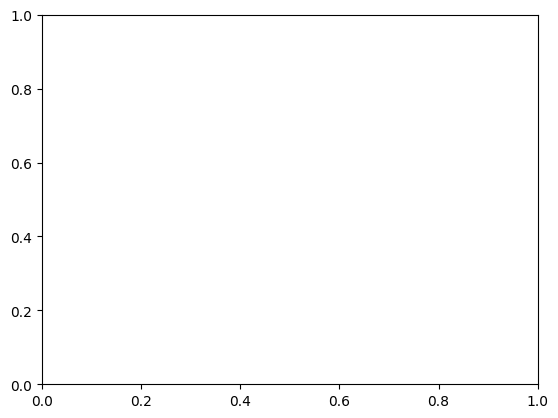

In [ ]:
import matplotlib.pyplot as plt
print(f'uncovered: {data_uncovered}')
# Create the plot
plt.plot(xs, ys)

# Add labels and title
plt.xlabel('X-axis label')
plt.ylabel('Y-axis label')
plt.title('Plot Title')

# Show the plot
plt.show()

## Doing Well

In [ ]:
analysis = pd.read_csv("/content/drive/MyDrive/Analysis-studentdoingwell-x377458_output.txt", delimiter='\t')
analysis_doing_well_true = analysis[analysis['Value'] == 1]
students_who_doing_well = set(analysis_doing_well_true['Student_ID'].drop_duplicates())
print(len(students_who_doing_well))
print(students_who_doing_well)

158
{'s315', 's81', 's61', 's176', 's294', 's243', 's298', 's21', 's60', 's230', 's171', 's173', 's224', 's174', 's35', 's50', 's154', 's318', 's49', 's56', 's277', 's321', 's102', 's57', 's178', 's164', 's46', 's355', 's113', 's158', 's44', 's325', 's99', 's70', 's288', 's226', 's228', 's118', 's80', 's188', 's201', 's132', 's216', 's323', 's262', 's126', 's98', 's234', 's296', 's63', 's352', 's146', 's214', 's255', 's300', 's260', 's324', 's40', 's292', 's106', 's86', 's322', 's237', 's181', 's111', 's26', 's185', 's270', 's354', 's163', 's53', 's33', 's157', 's358', 's20', 's212', 's254', 's182', 's329', 's75', 's7', 's265', 's109', 's100', 's279', 's307', 's6', 's30', 's73', 's38', 's223', 's335', 's124', 's342', 's258', 's1', 's191', 's341', 's3', 's305', 's251', 's297', 's268', 's357', 's213', 's175', 's71', 's152', 's19', 's72', 's350', 's79', 's15', 's179', 's89', 's14', 's119', 's42', 's156', 's107', 's41', 's121', 's76', 's172', 's186', 's167', 's85', 's77', 's65', 's285', 's

In [ ]:
xs = []
ys = []
selected_columns = ['Anon Student Id', 'Session Id', 'Time', 'Problem Name', 'Step Name', 'Help Level', 'Outcome', 'CF (Skill New p-Known)']
df = original_df[selected_columns]
config['students_doing_well_threshold'] = 1 # students_doing_well frequency

# get unique pairings of student id, session id, and problem name
selected_columns_for_unique_pairs = ['Anon Student Id', 'Session Id', 'Problem Name']
df_unique_pairs = original_df[selected_columns_for_unique_pairs]
df_unique_pairs = df_unique_pairs.drop_duplicates()

def get_analysis_file(link, student_id, session_id, problem_name):
  analysis = pd.read_csv(link, delimiter='\t')
  analysis = analysis[analysis['Student_ID'] == student_id]
  return analysis

data_uncovered = 0
N = len(df_unique_pairs)
for index_selecting in range(50,80):
  print(f"At i = {index_selecting}: ")
  xs.append(index_selecting)
  student_id, session_id, problem_name = df_unique_pairs.iloc[index_selecting]
  if student_id not in students_who_doing_well:
    continue
  calculation_df = original_df[(original_df['Anon Student Id'] == student_id)]

  calculation_df = calculation_df[calculation_df['Session Id'] == session_id]

  calculation_df = calculation_df[calculation_df['Problem Name'] == problem_name]

  status = calculate_status(calculation_df, config['window_size'], config['students_doing_well_threshold'], "students_doing_well")

  # print(get_statistics(system_misuse_status, "system_misuse"))

  calculation_df['students_doing_well_status'] = status
  df = calculation_df
  print(student_id, session_id, problem_name)
  analysis = get_analysis_file("/content/drive/MyDrive/Analysis-studentdoingwell-x377458_output.txt", student_id, session_id, problem_name)

  times_of_doing_well = set()
  for i in range(len(df)):
    if df.iloc[i]['students_doing_well_status']:
      times_of_doing_well.add(df.iloc[i]['Time'])

  print(times_of_doing_well)

  times_of_doing_well_analysis = set()
  times_of_doing_well_correct_identified = 0

  for i in range(len(analysis)):
    t = ' '.join(analysis.iloc[i]['Time'].split('.')[0].split('T'))
    if analysis.iloc[i]['Value'] == 1:
      times_of_doing_well_analysis.add(t)
      if t in times_of_doing_well:
        times_of_doing_well_correct_identified += 1
  print(times_of_doing_well_analysis)
  if len(times_of_doing_well_analysis) == 0:
    print('No doing well.')
    ys.append(-1)
  elif int(times_of_doing_well_correct_identified/len(times_of_doing_well_analysis)) == 0:
    print(f"0% correctly identified out of {len(times_of_doing_well_analysis)} misuses in analysis ")
    ys.append(0)
  else:
    rate_of_identification = round(times_of_doing_well_correct_identified/len(times_of_doing_well_analysis)*100, 2)
    print(f"{rate_of_identification}% correctly identified.")
    ys.append(rate_of_identification)

At i = 50: 
sum window =  0
sum window =  0
sum window =  1
sum window =  1
sum window =  1
sum window =  1
sum window =  1
sum window =  2
sum window =  2
sum window =  3
sum window =  3
sum window =  3
sum window =  3
sum window =  3
sum window =  3
sum window =  4
sum window =  4
s77 -9-45yozytmpfpdwyrt_hal-fgs:1668705624868 adding_and_subtracting_decimals_02
{'2022-11-17 17:21:52', '2022-11-17 17:21:53', '2022-11-17 17:22:28', '2022-11-17 17:21:41', '2022-11-17 17:22:16', '2022-11-17 17:21:51', '2022-11-17 17:22:21', '2022-11-17 17:21:50', '2022-11-17 17:21:40', '2022-11-17 17:21:44', '2022-11-17 17:22:29', '2022-11-17 17:21:46', '2022-11-17 17:22:17', '2022-11-17 17:21:48'}
{'2023-01-04 17:20:32', '2023-01-04 17:20:31', '2023-04-18 20:43:19', '2023-01-25 20:07:26', '2023-05-09 16:07:44', '2023-02-02 18:45:53', '2023-01-27 04:23:45', '2023-05-31 20:06:54', '2023-04-18 20:45:23', '2023-05-09 16:07:42', '2023-01-19 17:02:38', '2023-02-09 17:41:41', '2023-02-09 17:41:37', '2023-02-09 

In [ ]:
analysis = pd.read_csv("/content/drive/MyDrive/Analysis-studentdoingwell-x377458_output.txt", delimiter='\t')
print(len(analysis), len(original_df))
print(sorted(original_df[original_df['Anon Student Id'] == 's30']['Time'].unique()))

calculation_df = original_df[(original_df['Anon Student Id'] == student_id)]

calculation_df = calculation_df[calculation_df['Session Id'] == session_id]

calculation_df = calculation_df[calculation_df['Problem Name'] == problem_name]

calculation_df

397874 1650346
['2022-08-22 19:21:56', '2022-08-22 19:22:43', '2022-08-22 19:22:56', '2022-08-22 19:23:21', '2022-08-22 19:23:23', '2022-08-22 19:23:41', '2022-08-22 19:23:46', '2022-08-22 19:23:50', '2022-08-22 19:23:54', '2022-08-22 19:24:00', '2022-08-22 19:24:03', '2022-08-22 19:24:04', '2022-08-22 19:24:13', '2022-08-22 19:24:20', '2022-08-22 19:24:22', '2022-08-22 19:24:24', '2022-08-22 19:24:36', '2022-08-22 19:24:49', '2022-08-22 19:24:53', '2022-08-22 19:25:02', '2022-08-22 19:25:12', '2022-08-22 19:25:15', '2022-08-22 19:25:22', '2022-08-22 19:37:09', '2022-08-22 19:37:11', '2022-08-22 19:37:17', '2022-08-22 19:37:29', '2022-08-22 19:37:30', '2022-08-22 19:37:38', '2022-08-22 19:37:42', '2022-08-22 19:37:48', '2022-08-22 19:37:53', '2022-08-22 19:38:04', '2022-08-22 19:38:06', '2022-08-22 19:38:19', '2022-08-22 19:38:22', '2022-08-22 19:38:25', '2022-08-22 19:38:27', '2022-08-22 19:38:29', '2022-08-22 19:38:39', '2022-08-22 19:39:06', '2022-08-22 19:39:08', '2022-08-22 19:39:

,Anon Student Id,Session Id,Time,KC_Model(MATHia),Level (Section),Problem Name,Step Name,Attempt At Step,Help Level,Selection,...,CF (Skill Previous p-Known),CF (Skill New p-Known),CF (Module),CF (Workspace Encounter),CF (Workspace Variant),CF (Workspace Progress Status),CF (Skill Opportunity),cf_school_id,cf_class_id,"Selection <- ifelse(Action == ""Done Button"", ""Done Button"", NA)"
8234,s30,5uoeuav-ptj5gcf4xmezb9_o7a8:1668110612035,2022-11-10 20:15:19,NaN,exploring_two_step_equations_with_double_numbe...,exploring_two_step_equations_with_double_numbe...,component6.1,1,0,NaN,...,NaN,NaN,reasoning_algebraically_mb_c2,0,empty-variant,GRADUATED,NaN,sch8,c10,NaN
8235,s30,5uoeuav-ptj5gcf4xmezb9_o7a8:1668110612035,2022-11-10 20:15:20,NaN,exploring_two_step_equations_with_double_numbe...,exploring_two_step_equations_with_double_numbe...,component6.1,2,0,NaN,...,NaN,NaN,reasoning_algebraically_mb_c2,0,empty-variant,GRADUATED,NaN,sch8,c10,NaN
8236,s30,5uoeuav-ptj5gcf4xmezb9_o7a8:1668110612035,2022-11-10 20:15:24,NaN,exploring_two_step_equations_with_double_numbe...,exploring_two_step_equations_with_double_numbe...,component8.1,1,0,NaN,...,NaN,NaN,reasoning_algebraically_mb_c2,0,empty-variant,GRADUATED,NaN,sch8,c10,NaN
8237,s30,5uoeuav-ptj5gcf4xmezb9_o7a8:1668110612035,2022-11-10 20:15:26,NaN,exploring_two_step_equations_with_double_numbe...,exploring_two_step_equations_with_double_numbe...,component8.1,2,0,NaN,...,NaN,NaN,reasoning_algebraically_mb_c2,0,empty-variant,GRADUATED,NaN,sch8,c10,NaN
8238,s30,5uoeuav-ptj5gcf4xmezb9_o7a8:1668110612035,2022-11-10 20:15:28,NaN,exploring_two_step_equations_with_double_numbe...,exploring_two_step_equations_with_double_numbe...,component9.1,1,0,NaN,...,NaN,NaN,reasoning_algebraically_mb_c2,0,empty-variant,GRADUATED,NaN,sch8,c10,NaN
8239,s30,5uoeuav-ptj5gcf4xmezb9_o7a8:1668110612035,2022-11-10 20:15:56,NaN,exploring_two_step_equations_with_double_numbe...,exploring_two_step_equations_with_double_numbe...,component11.1,1,0,NaN,...,NaN,NaN,reasoning_algebraically_mb_c2,0,empty-variant,GRADUATED,NaN,sch8,c10,NaN
8240,s30,5uoeuav-ptj5gcf4xmezb9_o7a8:1668110612035,2022-11-10 20:15:57,NaN,exploring_two_step_equations_with_double_numbe...,exploring_two_step_equations_with_double_numbe...,component11.1,2,0,NaN,...,NaN,NaN,reasoning_algebraically_mb_c2,0,empty-variant,GRADUATED,NaN,sch8,c10,NaN
8241,s30,5uoeuav-ptj5gcf4xmezb9_o7a8:1668110612035,2022-11-10 20:15:58,NaN,exploring_two_step_equations_with_double_numbe...,exploring_two_step_equations_with_double_numbe...,component11.1,3,0,NaN,...,NaN,NaN,reasoning_algebraically_mb_c2,0,empty-variant,GRADUATED,NaN,sch8,c10,NaN
8242,s30,5uoeuav-ptj5gcf4xmezb9_o7a8:1668110612035,2022-11-10 20:15:58,NaN,exploring_two_step_equations_with_double_numbe...,exploring_two_step_equations_with_double_numbe...,component11.1,0,2,NaN,...,NaN,NaN,reasoning_algebraically_mb_c2,0,empty-variant,GRADUATED,NaN,sch8,c10,NaN
8243,s30,5uoeuav-ptj5gcf4xmezb9_o7a8:1668110612035,2022-11-10 20:15:59,NaN,exploring_two_step_equations_with_double_numbe...,exploring_two_step_equations_with_double_numbe...,component11.1,4,0,NaN,...,NaN,NaN,reasoning_algebraically_mb_c2,0,empty-variant,GRADUATED,NaN,sch8,c10,NaN


# Correlation Analysis

In [ ]:
i = 0
get_position = 300
misuse_rate, doing_well_rate, num_helped = [], [], []
for student_id, session_id in pairs:
  if i == 100: break
  df = original_df[selected_columns]
  df = df[df['Anon Student Id'] == student_id]
  df = df[df['Session Id'] == session_id]
  print(df['helpedTransaction'].value_counts())
  num_helped.append((df['helpedTransaction'] == True).sum())
  print(num_helped[-1], student_id, session_id)

  system_misuse_status = calculate_status(df, config['window_size'], config['system_misuse_threshold'], "system_misuse")
  print(get_statistics(system_misuse_status, "system_misuse")[0])
  misuse_rate.append(get_statistics(system_misuse_status, "system_misuse")[1])

  students_doing_well_status = calculate_status(df, config['window_size'], config['students_doing_well_threshold'], "students_doing_well")
  print(get_statistics(students_doing_well_status, "students_doing_well")[0])
  doing_well_rate.append(get_statistics(students_doing_well_status, "students_doing_well")[1])
  i+=1

helpedTransaction
False    294
True       3
Name: count, dtype: int64
3 s247 u2j5u3juhumtpxigdg7001ivxqw:1674481054953
Working on system_misuse:
system_misuse rate = 6.06%
Working on students_doing_well:
students_doing_well rate = 36.03%
helpedTransaction
False    338
True       2
Name: count, dtype: int64
2 s247 sqt17lcahcpvlkeabhdtmjugmlc:1677246093726
Working on system_misuse:
system_misuse rate = 19.41%
Working on students_doing_well:
students_doing_well rate = 35.29%
helpedTransaction
False    203
True       1
Name: count, dtype: int64
1 s247 8qyu2ukhwnc_1tsgaq3vbb1odlm:1673445380491
Working on system_misuse:
system_misuse rate = 9.8%
Working on students_doing_well:
students_doing_well rate = 36.76%
helpedTransaction
False    180
True       2
Name: count, dtype: int64
2 s247 qprm3hr7j_lefmthczktb5zkxsw:1669901910524
Working on system_misuse:
system_misuse rate = 19.78%
Working on students_doing_well:
students_doing_well rate = 42.86%
helpedTransaction
False    133
True       2
Nam

KeyboardInterrupt: 

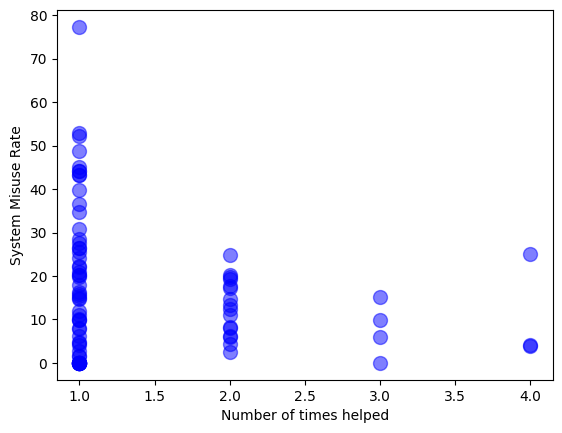

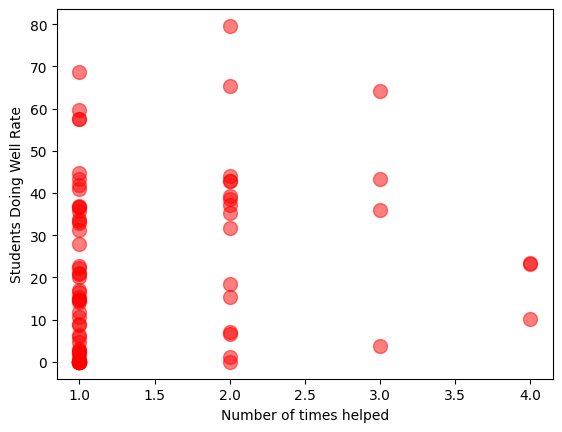

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
plt.scatter(num_helped[:-1], misuse_rate, color='blue', marker='o', s=100, alpha=0.5)
plt.xlabel('Number of times helped')
plt.ylabel('System Misuse Rate')
plt.show()
plt.scatter(num_helped[:-1], doing_well_rate, color='red', marker='o', s=100, alpha=0.5)
plt.xlabel('Number of times helped')
plt.ylabel('Students Doing Well Rate')
plt.show()

In [ ]:
i = 0
get_position = 304
misuse_rate, doing_well_rate, num_helped = [], [], []
for student_id, session_id in pairs[get_position:get_position+1]:
  if i == 100: break
  df = original_df[selected_columns]
  df = df[df['Anon Student Id'] == student_id]
  df = df[df['Session Id'] == session_id]
  print(df['helpedTransaction'].value_counts())
  num_helped.append((df['helpedTransaction'] == True).sum())
  print(num_helped[-1], student_id, session_id)

  system_misuse_status = calculate_status(df, config['window_size'], config['system_misuse_threshold'], "system_misuse")
  print(get_statistics(system_misuse_status, "system_misuse")[0])
  misuse_rate.append(get_statistics(system_misuse_status, "system_misuse")[1])

  students_doing_well_status = calculate_status(df, config['window_size'], config['students_doing_well_threshold'], "students_doing_well")
  print(get_statistics(students_doing_well_status, "students_doing_well")[0])
  doing_well_rate.append(get_statistics(students_doing_well_status, "students_doing_well")[1])
  i+=1

helpedTransaction
False    36
True      2
Name: count, dtype: int64
2 s209 iul6_4mbuv6o8afoi__d8pavgeq:1674839769831
Working on system_misuse:
system_misuse rate = 0.0%
Working on students_doing_well:
students_doing_well rate = 0.0%


In [ ]:
df['system_misuse_status'] = system_misuse_status
df['students_doing_well_status'] = students_doing_well_status
output_file_path = 'new.csv'
df.to_csv(output_file_path, index=False)
output_file_path  # Return the path to the new file

'new.csv'

In [ ]:
df = pd.read_csv(output_file_path)
print(len(df))

38


In [ ]:
helped_transaction_is_true = []
for i in range(len(df)):
  if df.iloc[i]['helpedTransaction'] == True:
    helped_transaction_is_true.append(i)
helped_transaction_is_true

[12, 25]

In [ ]:
def getWindow(index_of_true_help, window_size):
  print(f'index_of_true_help = {index_of_true_help}')
  num_misuse, num_doing_well, num_helped = 0,0,0
  for i in range(max(0, index_of_true_help-window_size//2), min(len(df), index_of_true_help+window_size//2)):
    if
    if df.iloc[i]['system_misuse_status']: num_misuse += 1
    if df.iloc[i]['students_doing_well_status']: num_doing_well += 1
    print('helped: ', df.iloc[i]['helpedTransaction'], '| misuse: ', df.iloc[i]['system_misuse_status'], '| doing well: ', df.iloc[i]['students_doing_well_status'])
for i in helped_transaction_is_true:
  getWindow(i, 10)
  print(num_helped, )


index_of_true_help = 12
helped:  False | misuse:  False | doing well:  False
helped:  False | misuse:  False | doing well:  False
helped:  False | misuse:  False | doing well:  False
helped:  False | misuse:  False | doing well:  False
helped:  False | misuse:  False | doing well:  False
helped:  True | misuse:  False | doing well:  False
helped:  False | misuse:  False | doing well:  False
helped:  False | misuse:  False | doing well:  False
helped:  False | misuse:  False | doing well:  False
helped:  False | misuse:  False | doing well:  False
index_of_true_help = 25
helped:  False | misuse:  False | doing well:  False
helped:  False | misuse:  False | doing well:  False
helped:  False | misuse:  False | doing well:  False
helped:  False | misuse:  False | doing well:  False
helped:  False | misuse:  False | doing well:  False
helped:  True | misuse:  False | doing well:  False
helped:  False | misuse:  False | doing well:  False
helped:  False | misuse:  False | doing well:  False
